In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from neupy import algorithms, layers, environment, estimators

In [2]:
def Database():
    """compile data sets into a data library, the output will be a DataFrame"""
    data_1 = pd.read_excel('Flash Point and Cetane Number Predictions for Fuel Compounds.xls', skiprows=3)
    data = data_1[['Name','Family', 'FP Exp.', 'CN Exp.']]
    result_1 = data.drop(index=0)
    result_1.reset_index(drop=True, inplace=True)
    data_2 = pd.read_excel('Flash Point and Cetane Number Predictions for Fuel Compounds.xls', skiprows=4)
    result_2 = data_2.loc[: , '-H': 'aaCa']
    result = pd.concat([result_1, result_2], axis=1)
    return result

In [ ]:
df = Database()
df = df[np.isfinite(df['FP Exp.'])]
x = df.loc[:,'-H':'aaCa']

In [ ]:
y = df['FP Exp.']

In [ ]:
array_x = x.values

In [ ]:
array_y = y.values

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
#target_scaler = preprocessing.MinMaxScaler()

In [ ]:
rescaledX = scaler.fit_transform(array_x)

In [ ]:
#target_scaler.fit_transform(np.reshape(array_y, (-1, 1)))

In [ ]:
np.set_printoptions(precision=4) # summarize transformed data for x

==========================================================================================================

### GRNN Algorithm

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(rescaledX, array_y, test_size=0.15)

In [ ]:
cgnet = algorithms.GRNN(std=0.3,verbose=True,)

In [ ]:
cgnet.train(x_train, y_train)
y_predict = cgnet.predict(x_test)

In [ ]:
estimators.rmse(y_predict, y_test)

In [ ]:
print("MSE value for GRNN method:", mean_squared_error(y_test, y_predict))

In [ ]:
print("r2 value for GRNN method:", r2_score(y_test, y_predict))

In [ ]:
y_predict=y_predict.astype('int')
y_test=y_test.astype('int')

In [ ]:
print("accuracy value for GRNN method:", accuracy_score(y_test, y_predict))

In [ ]:
plt.scatter(y_predict, y_test)
plt.title('General Regression Neural Network')
plt.xlabel('y_test')
plt.ylabel('y_predict')

===================================================================================================

### Hessian Algorithm

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
#target_scaler = preprocessing.MinMaxScaler()

In [ ]:
rescaledX = scaler.fit_transform(array_x)

In [ ]:
#target = target_scaler.fit_transform(np.reshape(array_y, (-1, 1)))

In [ ]:
np.set_printoptions(precision=3) # summarize transformed data for x

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(rescaledX, array_y, test_size=0.15)

In [ ]:
cgnet = algorithms.Hessian(connection=[layers.Input(28), layers.Sigmoid(10), layers.Sigmoid(30), layers.Sigmoid(1),],verbose=True,)

In [ ]:
cgnet.train(x_train, y_train, x_test, y_test, epochs=15)
y_predict = cgnet.predict(x_test)

In [ ]:
error = estimators.rmsle(y_predict, y_test)

In [ ]:
from neupy import plots
plots.error_plot(cgnet)

In [ ]:
print("MSE value for Hessian method:", mean_squared_error(y_test, y_predict))

In [ ]:
print("r2 value for Hessian method:", r2_score(y_test, y_predict))

In [ ]:
y_predict = y_predict.astype('int')
y_test = y_test.astype('int')

In [ ]:
print("accuracy value for GRNN method:", accuracy_score(y_test, y_predict))

In [ ]:
plt.scatter(y_test, y_predict)
plt.title('Hessian Networks')
plt.xlabel('y_test')
plt.ylabel('y_predict')

====================================================================================================

### Sklearn for Neural Networks (MLPRegressor)

In [33]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [34]:
df = Database()
df = df[np.isfinite(df['FP Exp.'])]
x = df.loc[:,'-H':'aaCa']
y = df['FP Exp.']
array_x = x.values
array_y = y.values

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(array_x)
np.set_printoptions(precision=3) # summarize transformed data for x

D:\Miniconda\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [50]:
x_train, x_test, y_train, y_test = train_test_split(rescaledX, array_y, test_size=0.15, random_state=17)

In [51]:
MLPR = MLPRegressor(hidden_layer_sizes=(1000,),activation='identity', solver='sgd', learning_rate='adaptive', max_iter=4000, verbose=False)

In [52]:
MLPR_training = MLPR.fit(x_train, y_train)

In [53]:
y_predict = MLPR.predict(x_test)

In [54]:
mean_squared_error(y_predict, y_test)

310.62555131186338

In [55]:
r2_score(y_predict, y_test)

0.84211961146567882

Text(0,0.5,'y_predict')

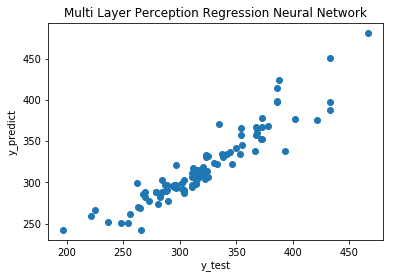

In [56]:
plt.scatter(y_test, y_predict)
plt.title('Multi Layer Perception Regression Neural Network')
plt.xlabel('y_test')
plt.ylabel('y_predict')